In [1]:
# Step 1: Identify an analytical/research question of interest which would be the goal of your analysis.
# Question: Are housing prices equally affected by square footage with waterfront vs non-waterfront property?

# Step 2: Identify data required to build the model 
# Data: Going to need to separate waterfront and non-waterfront properties

# Step 3: Evaluate the data
# Look at the quality of the data for each category (are there enough waterfront properties to compare data)

# Step 4: EDA - Assess relationships (uni-variate and bi-variate)

# Step 5: Fit an initial model

# Step 6: Revise the fitted model

# Step 7: Repeat above step until satisfied


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Import and preview housing data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Look at housing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Look at descriptive information of housing data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Bedrooms, floors, condition, and grade all appear to be categorical data
# Waterfront appears to be a boolean dataset for true/false

In [6]:
# Check for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

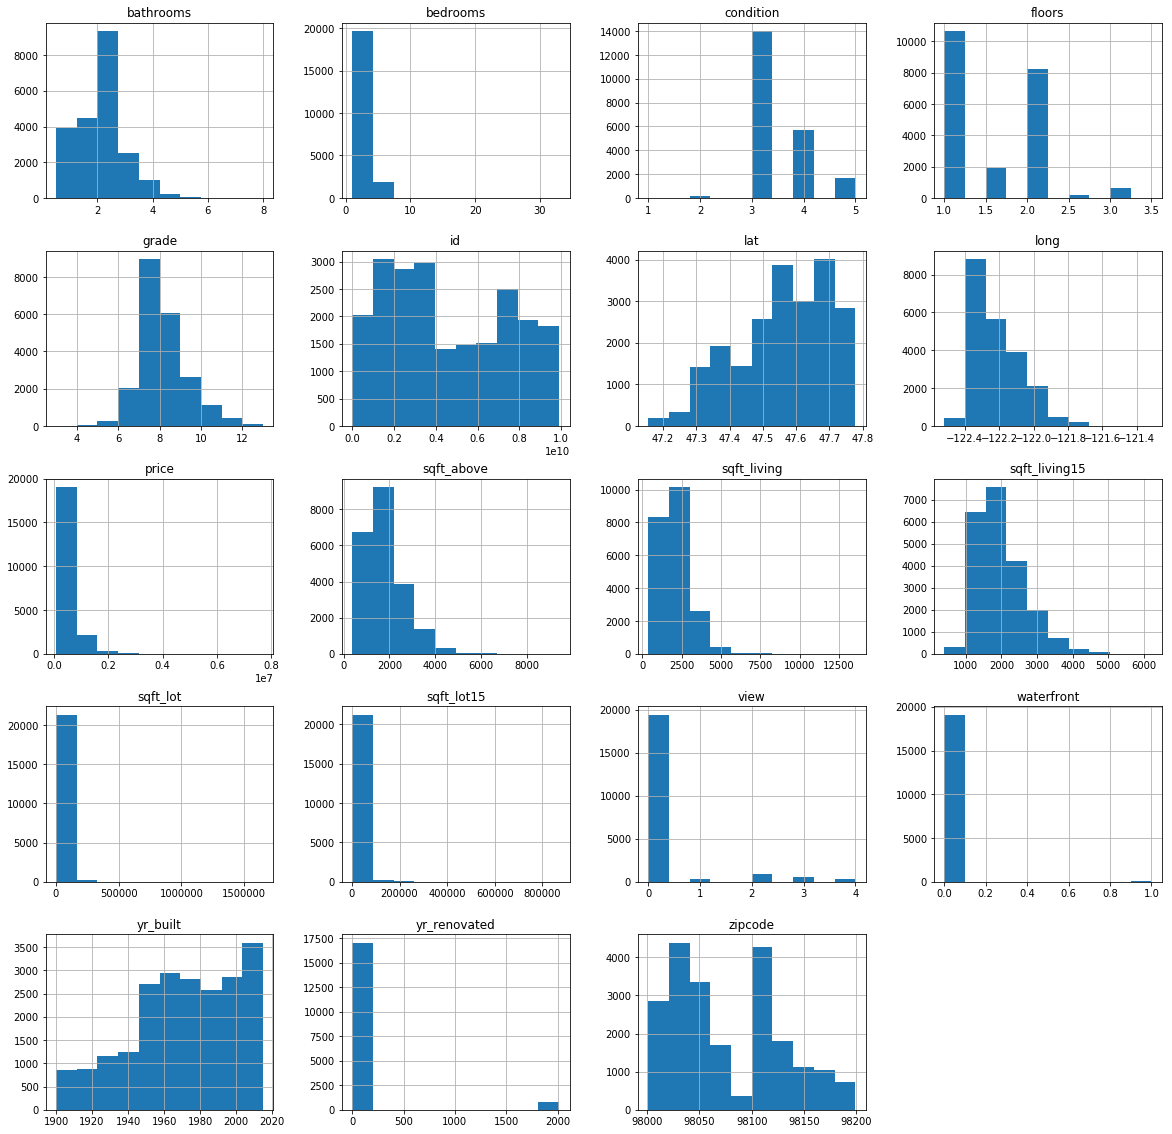

In [7]:
# Plot histogram of each column to see layout of each piece of data
df.hist(figsize =(20,20));

In [8]:
#CLEAN DATA

In [9]:
# Change sqft_basement '?' values to '0.0'
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')
# Change sqft_basement type from object to np.float64, check success via .info()
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [10]:
# Change yr_renovated null values to 0, check success via .unique()
df.yr_renovated.fillna(0., inplace=True)
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [11]:
# Remove yr_removed data with value of 0
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [12]:
# Too many 0 values to be worth examining renovation data

In [13]:
# Create column sqft_total to examine the combined square feet between basement and living room
df['sqft_total'] = df.sqft_basement + df.sqft_living

In [14]:
# Create Separate Price Dataframe and store in its own variable - price
# This will be used later for OLS and EDA
price = df.price
price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [15]:
# Create two separate dataframes based on grade of house, either greater than or equal to 8 = above_8
# Set other dataframe based on grade of house less than 8 = below_8

In [16]:
below_8 = df.loc[df["grade"]< 8]
above_8 = df.loc[df["grade"]>= 8]

In [17]:
print(len(above_8))
print(len(below_8))
print((len(above_8)+len(below_8)) == len(df))
# This checks length of two groups to make sure it's not too biased
# Also checking to confirm there weren't any values missed from the original DataFrame

10315
11282
True


In [18]:
# Examine information in above_8 group
above_8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1680.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,6950.0
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,5260.0
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,3920.0
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,3770.0


In [19]:
# Examine information in below_8 group
below_8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1180.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2970.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,770.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2870.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,1715.0


In [20]:
# Remove columns: id, date, sqft_lot, floors, waterfront, view, condition, yr_renovated, lat, long, grade,
# yr_built, zipcode, sqft_lot15, sqft_living, and sqft_basement in order to simplify data
above_8.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_renovated', 'lat', 'long',
                      'grade', 'yr_built', 'zipcode', 'sqft_lot15', 'sqft_living', 'sqft_basement'], axis=1, inplace=True)
above_8.head()

/Users/steeznation/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,price,bedrooms,bathrooms,sqft_above,sqft_living15,sqft_total
4,510000.0,3,2.00,1680,1800,1680.0
5,1230000.0,4,4.50,3890,4760,6950.0
10,662500.0,3,2.50,1860,2210,5260.0
15,650000.0,4,3.00,1980,2140,3920.0
21,2000000.0,3,2.75,2330,4110,3770.0


In [21]:
# Remove columns: id, date, sqft_lot, floors, waterfront, view, condition, yr_renovated, lat, long, grade,
# yr_built, zipcode, sqft_lot15, sqft_living, and sqft_basement in order to simplify data
below_8.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_renovated', 'lat', 'long',
                      'grade', 'yr_built', 'zipcode', 'sqft_lot15', 'sqft_living', 'sqft_basement'], axis=1, inplace=True)
below_8.head()

/Users/steeznation/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,price,bedrooms,bathrooms,sqft_above,sqft_living15,sqft_total
0,221900.0,3,1.00,1180,1340,1180.0
1,538000.0,3,2.25,2170,1690,2970.0
2,180000.0,2,1.00,770,2720,770.0
3,604000.0,4,3.00,1050,1360,2870.0
6,257500.0,3,2.25,1715,2238,1715.0


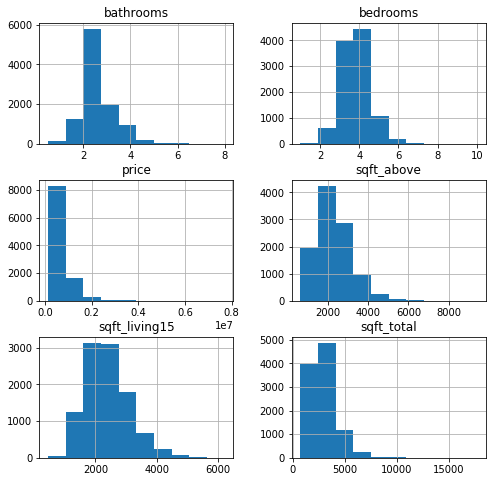

In [22]:
# Examine histogram of each column to identify skewness
above_8.hist(figsize=(8,8));

/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

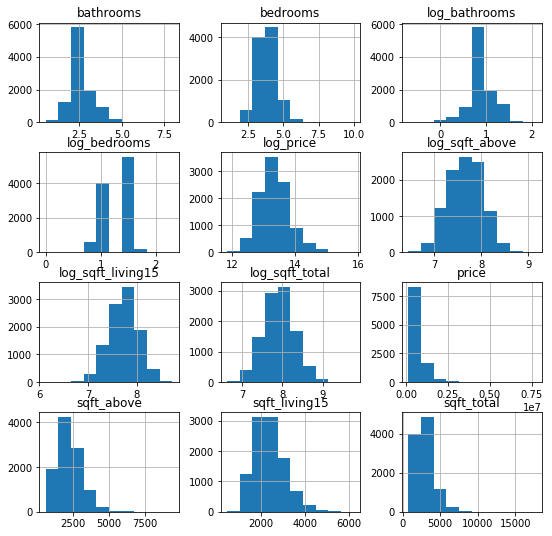

In [23]:
# log normalize each column in order to examine normalized date
above_8['log_bathrooms'] = np.log(above_8['bathrooms']);
above_8['log_bedrooms'] = np.log(above_8['bedrooms']);
above_8['log_price'] = np.log(above_8['price']);
above_8['log_sqft_above'] = np.log(above_8['sqft_above']);
above_8['log_sqft_living15'] = np.log(above_8['sqft_living15']);
above_8['log_sqft_total'] = np.log(above_8['sqft_total']);
above_8.hist(figsize=(9,9));

In [24]:
# Drop bathrooms, bedrooms, log_bedrooms, log_sqft_above, log_sqft_living15, sqft_above, sqft_living15, log_bathrooms
# Leaves normalized data for sqft_total to compare with price
above_8.drop(columns=['bathrooms', 'bedrooms', 'log_bedrooms', 'log_sqft_above', 'log_sqft_living15', 'sqft_above',
                     'sqft_living15', 'log_bathrooms'], axis=1, inplace=True)

/Users/steeznation/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


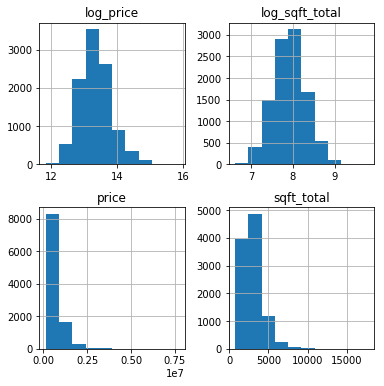

In [25]:
above_8.hist(figsize=(6,6));

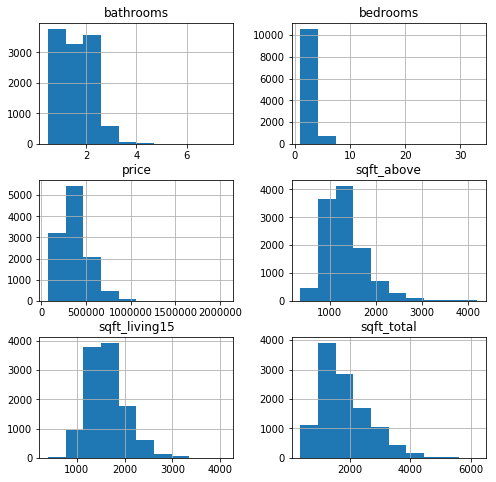

In [26]:
# Examine histogram of each column to identify skewness
below_8.hist(figsize=(8,8));

/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/steeznation/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

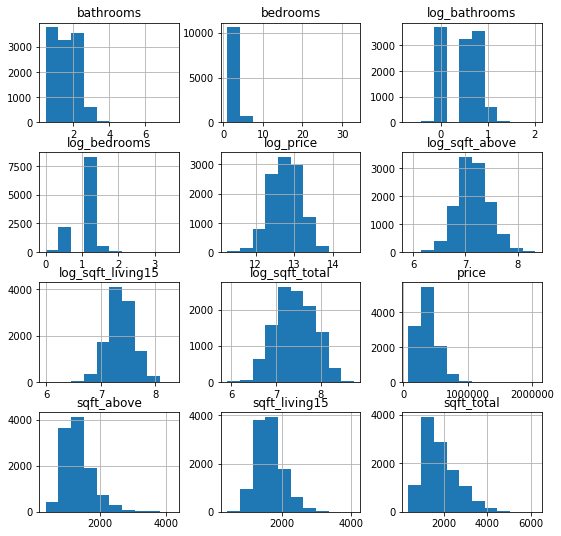

In [27]:
# log normalize each column in order to examine normalized date
below_8['log_bathrooms'] = np.log(below_8['bathrooms']);
below_8['log_bedrooms'] = np.log(below_8['bedrooms']);
below_8['log_price'] = np.log(below_8['price']);
below_8['log_sqft_above'] = np.log(below_8['sqft_above']);
below_8['log_sqft_living15'] = np.log(below_8['sqft_living15']);
below_8['log_sqft_total'] = np.log(below_8['sqft_total']);
below_8.hist(figsize=(9,9));

In [28]:
# Drop bathrooms, bedrooms, log_bedrooms, log_sqft_above, log_sqft_living15, sqft_above, sqft_living15, log_bathrooms
# Leaves normalized data for sqft_total to compare with price
below_8.drop(columns=['bathrooms', 'bedrooms', 'log_bedrooms', 'log_sqft_above', 'log_sqft_living15', 'sqft_above',
                      'sqft_living15', 'log_bathrooms'], axis=1, inplace=True)

/Users/steeznation/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


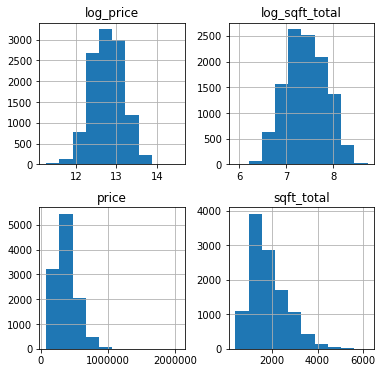

In [29]:
below_8.hist(figsize=(6,6));

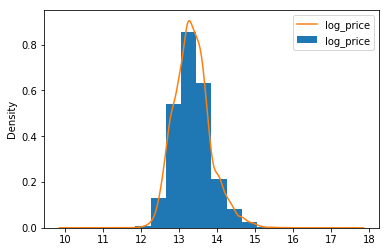

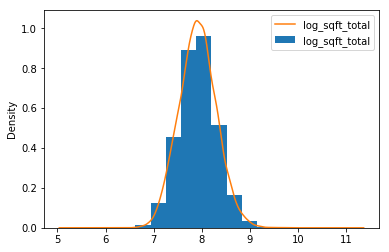

In [30]:
for column in ['log_price', 'log_sqft_total']:
    above_8[column].plot.hist(density=True)
    above_8[column].plot.kde(label=column)
    plt.legend()
    plt.show()

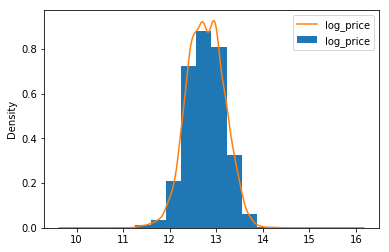

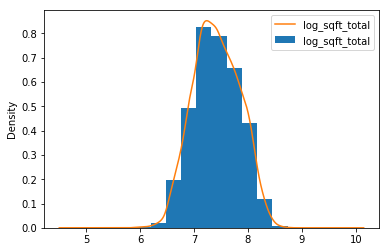

In [31]:
for column in ['log_price', 'log_sqft_total']:
    below_8[column].plot.hist(density=True)
    below_8[column].plot.kde(label=column)
    plt.legend()
    plt.show()

In [32]:
df_ols = pd.DataFrame([])
df_ols['price'] = df.price
df_ols['grade'] = df.grade
df_ols['total_sqft'] = df.sqft_total
df_ols.sort_values(by=['grade'], inplace=True)
df_ols.head()

,price,grade,total_sqft
3220,262000.0,3,520.0
1065,140000.0,4,730.0
8588,205000.0,4,770.0
5199,352000.0,4,760.0
8610,355000.0,4,950.0


In [33]:
df1 = pd.DataFrame([])
df1['price'] = above_8['price']
df1['total_sqft'] = above_8['log_sqft_total']

import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'price~total_sqft'
model = ols(formula= f, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     5075.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:56:10   Log-Likelihood:            -1.4672e+05
No. Observations:               10315   AIC:                         2.934e+05
Df Residuals:                   10313   BIC:                         2.935e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.482e+06    7.3e+04    -61.367      0.000   -4.63e+06   -4.34e+06
total_sqft  6.565e+05   9215.623     71.241      0.000    6.38e+05    6.75e+05
==============================================================================
Omnibus:                     7769.939   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           326927.452
Skew:                           3.201   Prob(JB):                         0.00
Kurtosis:                      29.827   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df2 = pd.DataFrame([])
df2['price'] = below_8['price']
df2['total_sqft'] = below_8['log_sqft_total']

import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'price~total_sqft'
model = ols(formula= f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     2033.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:56:19   Log-Likelihood:            -1.4997e+05
No. Observations:               11282   AIC:                         2.999e+05
Df Residuals:                   11280   BIC:                         3.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.715e+05   2.34e+04    -28.728      0.000   -7.17e+05   -6.26e+05
total_sqft  1.419e+05   3146.092     45.088      0.000    1.36e+05    1.48e+05
==============================================================================
Omnibus:                     2829.095   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9608.308
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       6.767   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#logprice_1 = above_8.log_price
#logsqft_total_1 = above_8.log_sqft_total
#logprice_2 = below_8.log_price
#logsqft_total_2 = below_8.log_sqft_total

#scaled_sqft_total_1 = (logsqft_total_1-np.mean(logsqft_total_1))/np.sqrt(np.var(logsqft_total_1))
#scaled_price_1 = (logprice_1-np.mean(logprice_1))/np.sqrt(np.var(logprice_1))
#scaled_sqft_total_2 = (logsqft_total_2-np.mean(logsqft_total_2))/np.sqrt(np.var(logsqft_total_2))
#scaled_price_2 = (logprice_2-np.mean(logprice_2))/np.sqrt(np.var(logprice_2))

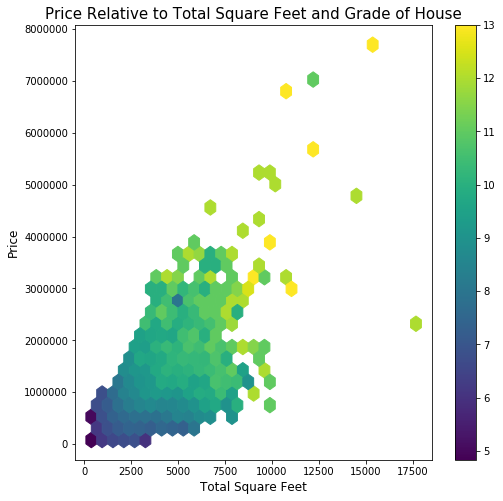

In [50]:
df.plot.hexbin(x='sqft_total', y='price', C='grade', gridsize=30, cmap="viridis", sharex=False, figsize=(8,8))
plt.title('Price Relative to Total Square Feet and Grade of House', fontsize=15)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total Square Feet', fontsize=12)
plt.show()

In [ ]:
# Drop Price, ID, Date, View, Latitude, Longitude, and Zipcode columns from data
df = df.drop(columns=['price'], axis=0)
df.head()

In [15]:
# Remove id, lat, long, sqft_lot, sqft_lot15, view, yr_renovated
df.drop(columns=['id', 'lat', 'long', 'sqft_lot', 'sqft_lot15', 'view', 'yr_renovated'], axis=0, inplace=True)
df.head()

,date,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15
0,10/13/2014,3,1.00,1180,1.0,NaN,3,7,1180,0.0,1955,98178,1340
1,12/9/2014,3,2.25,2570,2.0,0.0,3,7,2170,400.0,1951,98125,1690
2,2/25/2015,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,98028,2720
3,12/9/2014,4,3.00,1960,1.0,0.0,5,7,1050,910.0,1965,98136,1360
4,2/18/2015,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,98074,1800


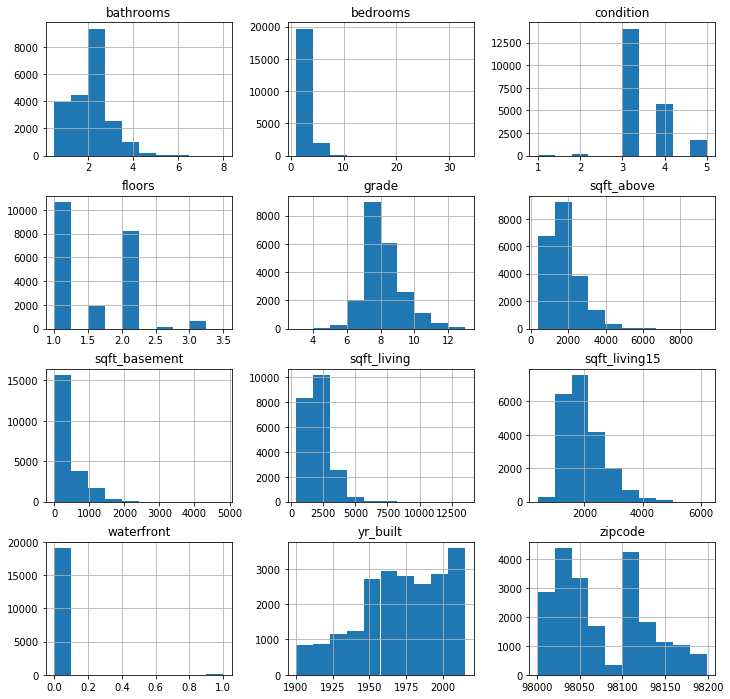

In [16]:
df.hist(figsize=(12,12));

In [17]:
df['log_bathrooms'] = np.log(df['bathrooms'])
df['log_bedrooms'] = np.log(df['bedrooms'])
df['log_condition'] = np.log(df['condition'])
df['log_floors'] = np.log(df['floors'])
df['log_grade'] = np.log(df['grade'])
df['log_sqft_above'] = np.log(df['sqft_above'])
#df['log_sqft_basement'] = np.log(df['sqft_basement'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['not_log_waterfront'] = df['waterfront']
df['log_yr_built'] = np.log(df['yr_built'])
df['not_log_zipcode'] = df['zipcode']

In [18]:
log_df = df.drop(columns=['bedrooms', 'bathrooms', 'floors', 'condition',
                         'grade', 'sqft_above'], axis=0)

In [27]:
log_df['price'] = price

In [33]:
log_df.corr()

,log_bathrooms,log_bedrooms,log_grade,log_sqft_above,log_sqft_living,log_sqft_living15,price
log_bathrooms,1.000000,0.534008,0.656387,0.683889,0.760764,0.570469,0.456122
log_bedrooms,0.534008,1.000000,0.394210,0.546713,0.648121,0.425690,0.298844
log_grade,0.656387,0.394210,1.000000,0.738583,0.744356,0.681776,0.635153
log_sqft_above,0.683889,0.546713,0.738583,1.000000,0.864979,0.713102,0.542675
log_sqft_living,0.760764,0.648121,0.744356,0.864979,1.000000,0.746836,0.611839
log_sqft_living15,0.570469,0.425690,0.681776,0.713102,0.746836,1.000000,0.543829
price,0.456122,0.298844,0.635153,0.542675,0.611839,0.543829,1.000000


In [20]:
log_df = log_df.drop(columns=['log_condition', 'log_floors', 'log_yr_built',
                             'not_log_zipcode', 'sqft_basement', 'waterfront', 'yr_built', 'zipcode'], axis=1)

In [21]:
log_df.describe()

,sqft_living,sqft_living15,log_bathrooms,log_bedrooms,log_grade,log_sqft_above,log_sqft_living,log_sqft_living15,not_log_waterfront
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000
mean,2080.321850,1986.620318,0.677623,1.177819,2.024455,7.395148,7.550720,7.539494,0.007596
std,918.106125,685.230472,0.392481,0.283167,0.149345,0.427140,0.424191,0.327467,0.086825
min,370.000000,399.000000,-0.693147,0.000000,1.098612,5.913503,5.913503,5.988961,0.000000
25%,1430.000000,1490.000000,0.559616,1.098612,1.945910,7.081709,7.265430,7.306531,0.000000
50%,1910.000000,1840.000000,0.810930,1.098612,1.945910,7.352441,7.554859,7.517521,0.000000
75%,2550.000000,2360.000000,0.916291,1.386294,2.079442,7.700748,7.843849,7.766417,0.000000
max,13540.000000,6210.000000,2.079442,3.496508,2.564949,9.149528,9.513404,8.733916,1.000000


In [22]:
log_df = log_df.drop(columns=['sqft_living', 'sqft_living15', 'not_log_waterfront'], axis=1)

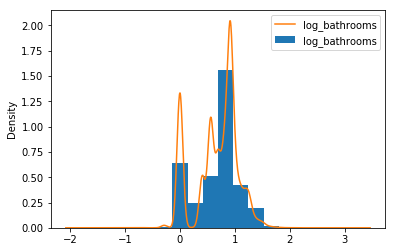

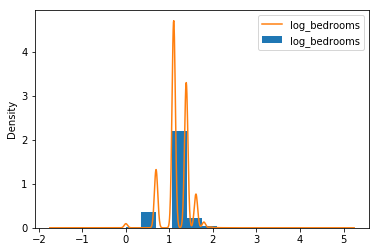

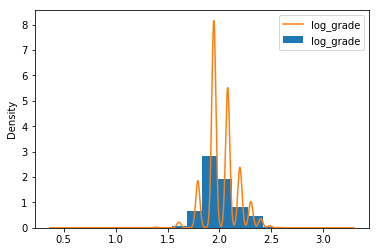

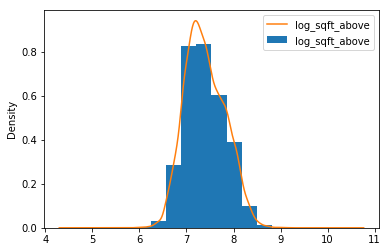

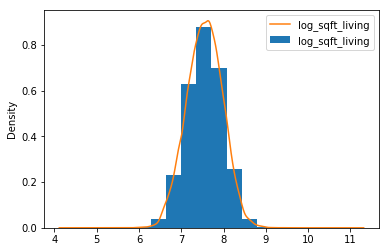

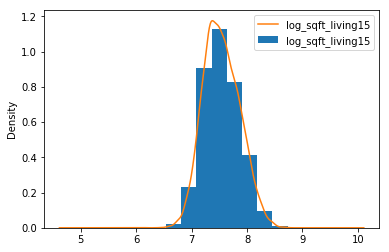

In [23]:
for column in ['log_bathrooms', 'log_bedrooms', 'log_grade', 'log_sqft_above', 'log_sqft_living', 'log_sqft_living15']:
    log_df[column].plot.hist(density=True)
    log_df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

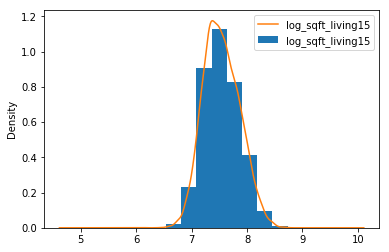

In [184]:
# Log normalize sqft_living15 and graph results
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_sqft_living15'].plot.hist(density=True)
df['log_sqft_living15'].plot.kde(label='log_sqft_living15')
plt.legend()
plt.show()

In [ ]:
abs(df.corr()) >0.7

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(graphs, price, test_size=0.3, random_state=42) # for reproducility

In [141]:
# Print the split datasets
print (X_train)
print (y_train)
print (X_test)
print (y_test)

       bedrooms  bathrooms  sqft_living  grade  sqft_above  sqft_basement  \
753           2       2.50         2380      8        2380            0.0   
1418          4       3.75         3190     10        3190            0.0   
8178          3       2.50         1730      8        1730            0.0   
2254          4       2.00         1870      7        1870            0.0   
4063          8       3.00         2850      7        2850            0.0   
20396         3       2.50         1870      8        1380          490.0   
16030         5       3.50         3580      8        2140         1440.0   
21212         3       2.00         1680      7        1680            0.0   
6933          4       2.25         3220      8        3220            0.0   
6442          4       2.50         2060      6        2060            0.0   
9841          4       2.25         2870      8        1480         1390.0   
17178         3       1.00         1320      7        1320            0.0   

In [150]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15117 6480 15117 6480


In [151]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [152]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [153]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 47297880470.099556
Test Mean Squarred Error: 48828633449.283745


In [154]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 47297880470.099556
Test Mean Squarred Error: 48828633449.283745


In [17]:
housing.waterfront.fillna(0, inplace=True)

In [18]:
housing.waterfront.unique()

array([0., 1.])